In [26]:
import pandas as pd
import quandl
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

In [4]:
api_key= open('quandlapikey.txt','r').read()

In [5]:
def state_list():
    fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    return fiddy_states[0][0][1:]
    

def grab_initial_state_data():
    states = state_list()

    main_df = pd.DataFrame()

    for abbv in states:
        query = "FMAC/HPI_"+str(abbv)
        df = quandl.get(query, authtoken=api_key)
        df.rename(columns={'Value':str(abbv)}, inplace=True)#its done because of value error
        df=df.pct_change()
        print(query)
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df)
    pickle_out = open('fiddy_states.pickle','wb')#write bytes for wb
    pickle.dump(main_df, pickle_out)
    pickle_out.close()        
grab_initial_state_data()

FMAC/HPI_AL
FMAC/HPI_AK
FMAC/HPI_AZ
FMAC/HPI_AR
FMAC/HPI_CA
FMAC/HPI_CO
FMAC/HPI_CT
FMAC/HPI_DE
FMAC/HPI_FL
FMAC/HPI_GA
FMAC/HPI_HI
FMAC/HPI_ID
FMAC/HPI_IL
FMAC/HPI_IN
FMAC/HPI_IA
FMAC/HPI_KS
FMAC/HPI_KY
FMAC/HPI_LA
FMAC/HPI_ME
FMAC/HPI_MD
FMAC/HPI_MA
FMAC/HPI_MI
FMAC/HPI_MN
FMAC/HPI_MS
FMAC/HPI_MO
FMAC/HPI_MT
FMAC/HPI_NE
FMAC/HPI_NV
FMAC/HPI_NH
FMAC/HPI_NJ
FMAC/HPI_NM
FMAC/HPI_NY
FMAC/HPI_NC
FMAC/HPI_ND
FMAC/HPI_OH
FMAC/HPI_OK
FMAC/HPI_OR
FMAC/HPI_PA
FMAC/HPI_RI
FMAC/HPI_SC
FMAC/HPI_SD
FMAC/HPI_TN
FMAC/HPI_TX
FMAC/HPI_UT
FMAC/HPI_VT
FMAC/HPI_VA
FMAC/HPI_WA
FMAC/HPI_WV
FMAC/HPI_WI
FMAC/HPI_WY


# loading data from pickle

In [6]:
pickle_in = open('fiddy_states.pickle','rb')# read bytes for rb
HPI_data = pickle.load(pickle_in)
print(HPI_data)

                      AL        AK        AZ        AR        CA        CO  \
Date                                                                         
1975-01-31           NaN       NaN       NaN       NaN       NaN       NaN   
1975-02-28  5.639407e-03  0.014433  0.016223  0.010442  0.003103  0.009738   
1975-03-31  6.538878e-03  0.014572  0.015380  0.009089  0.012364  0.009692   
1975-04-30  7.868429e-03  0.015142  0.012230  0.007307  0.019898  0.009709   
1975-05-31  6.982165e-03  0.016672  0.006845  0.006626  0.015804  0.008652   
1975-06-30  2.889699e-03  0.017864 -0.000790  0.006432  0.006397  0.007635   
1975-07-31 -2.578846e-03  0.017566 -0.009514  0.005215  0.006899  0.005311   
1975-08-31 -6.473418e-03  0.015700 -0.015671  0.002933  0.013894  0.000064   
1975-09-30 -6.601531e-03  0.013326 -0.016480 -0.000029  0.015193 -0.003180   
1975-10-31 -2.428603e-03  0.011378 -0.008766 -0.001377  0.012205 -0.000177   
1975-11-30  3.843614e-03  0.009308  0.004925  0.000501  0.007691

In [20]:
HPI_data = pd.read_pickle('fiddy_states.pickle')
HPI_data['TX1yr'] = HPI_data['TX'].resample('A',how="mean")
print(HPI_data[['TX','TX1yr']])

                  TX     TX1yr
Date                          
1975-01-31       NaN       NaN
1975-02-28  0.011486       NaN
1975-03-31  0.019299       NaN
1975-04-30  0.025842       NaN
1975-05-31  0.005728       NaN
1975-06-30 -0.014379       NaN
1975-07-31 -0.008919       NaN
1975-08-31 -0.000379       NaN
1975-09-30  0.002842       NaN
1975-10-31  0.003586       NaN
1975-11-30  0.006688       NaN
1975-12-31  0.006177  0.005270
1976-01-31  0.003914       NaN
1976-02-29  0.009035       NaN
1976-03-31  0.021220       NaN
1976-04-30  0.028964       NaN
1976-05-31  0.008217       NaN
1976-06-30 -0.011187       NaN
1976-07-31 -0.005693       NaN
1976-08-31 -0.000306       NaN
1976-09-30  0.002755       NaN
1976-10-31  0.006312       NaN
1976-11-30  0.008447       NaN
1976-12-31  0.005779  0.006455
1977-01-31  0.004491       NaN
1977-02-28  0.011466       NaN
1977-03-31  0.027821       NaN
1977-04-30  0.042738       NaN
1977-05-31  0.006916       NaN
1977-06-30 -0.024147       NaN
...     

/home/fractaluser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  


# drop NAN using dropna function

In [21]:
HPI_data.dropna(inplace=True)
print(HPI_data[['TX','TX1yr']])

                  TX     TX1yr
Date                          
1975-12-31  0.006177  0.005270
1976-12-31  0.005779  0.006455
1977-12-31  0.016037  0.010537
1978-12-31  0.013222  0.012174
1979-12-31  0.013986  0.012923
1980-12-31 -0.001298  0.006720
1981-12-31  0.010669  0.007485
1982-12-31 -0.002660  0.004049
1983-12-31 -0.000573  0.003521
1984-12-31 -0.001983  0.002426
1985-12-31 -0.005173 -0.000356
1986-12-31 -0.003248 -0.002113
1987-12-31 -0.007982 -0.006478
1988-12-31 -0.000021 -0.002334
1989-12-31 -0.000721  0.001601
1990-12-31  0.004241  0.000261
1991-12-31  0.003584  0.002098
1992-12-31 -0.004872  0.002808
1993-12-31 -0.002047  0.003159
1994-12-31 -0.002278  0.001991
1995-12-31  0.002314  0.002496
1996-12-31 -0.001312  0.001731
1997-12-31  0.002668  0.003058
1998-12-31  0.003105  0.004717
1999-12-31  0.007266  0.005378
2000-12-31  0.000346  0.005132
2001-12-31 -0.002011  0.002997
2002-12-31 -0.001013  0.003368
2003-12-31 -0.000782  0.001746
2004-12-31 -0.001888  0.002698
2005-12-

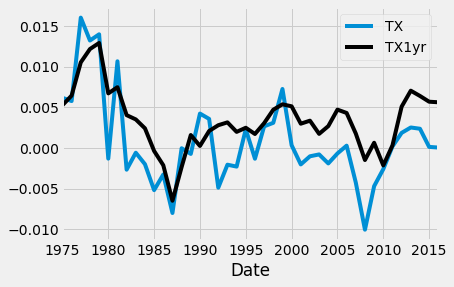

In [28]:
HPI_data['TX'].plot()
HPI_data['TX1yr'].plot(color='k')

plt.legend()
plt.show()

# implementing fillna

In [29]:
HPI_data.fillna(method='ffill',inplace=True)

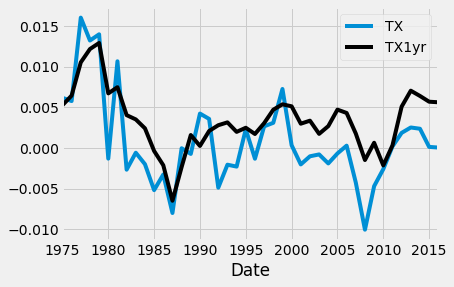

In [30]:
HPI_data['TX'].plot()
HPI_data['TX1yr'].plot(color='k')

plt.legend()
plt.show()

In [31]:
HPI_data.fillna(method='bfill',inplace=True)

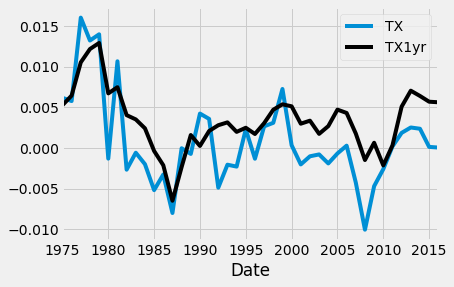

In [32]:
HPI_data['TX'].plot()
HPI_data['TX1yr'].plot(color='k')

plt.legend()
plt.show()